In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re
import time

pd.options.mode.chained_assignment = None 

#### Import the data and get a high-level picture

In [92]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [93]:
df.shape

(29922, 6)

In [94]:
df.dtypes



order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [95]:
df = df.astype({'ordered_at' : "datetime64[ns]"})

In [96]:

for i in range(df.shape[0]):
    df["price"][i] = df["price"][i].replace('$','')
    df["line_total"][i] = df["line_total"][i].replace('$','')
    print(i, df["price"][i])


df = df.astype({'price' : "float"})
df = df.astype({'line_total' : "float"})

0 3.50
1 3.50
2 2.50
3 1.50
4 3.50
5 3.00
6 3.00
7 0.50
8 1.50
9 2.50
10 2.50
11 1.50
12 3.00
13 1.50
14 2.50
15 1.50
16 4.00
17 0.50
18 2.50
19 2.00
20 3.00
21 4.00
22 3.50
23 2.50
24 3.50
25 1.00
26 2.50
27 2.50
28 -1.50
29 2.50
30 2.50
31 0.50
32 2.50
33 2.50
34 1.00
35 1.50
36 2.50
37 3.50
38 1.50
39 2.50
40 0.50
41 3.00
42 1.50
43 2.50
44 1.50
45 3.50
46 2.50
47 2.00
48 1.50
49 3.50
50 3.50
51 -2.50
52 2.00
53 3.00
54 1.50
55 3.50
56 0.50
57 2.50
58 3.50
59 2.50
60 1.50
61 1.50
62 4.00
63 3.50
64 1.50
65 4.00
66 1.50
67 1.50
68 3.00
69 4.00
70 1.50
71 2.00
72 2.50
73 1.50
74 2.50
75 2.50
76 3.00
77 0.50
78 3.50
79 1.50
80 2.50
81 1.50
82 1.50
83 2.00
84 2.50
85 4.00
86 4.00
87 3.00
88 3.50
89 1.50
90 0.50
91 2.50
92 1.50
93 1.50
94 2.50
95 2.00
96 4.00
97 2.50
98 2.00
99 4.00
100 1.50
101 2.50
102 1.00
103 1.50
104 1.50
105 2.00
106 4.00
107 2.00
108 1.50
109 1.50
110 1.00
111 2.00
112 4.00
113 3.50
114 3.50
115 3.00
116 1.50
117 1.50
118 2.50
119 1.50
120 0.50
121 3.50
122 1.50
1

In [97]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [98]:

df = df.drop_duplicates()

In [114]:
df = df.dropna()

In [100]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [115]:
df[df.duplicated()].shape[0]

1

In [116]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [117]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

0

In [118]:
df[df['line_total'] < 0].shape[0]

0

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [106]:
df = df[df['line_total'] >= 0]

   

In [113]:
indices = []
for i in range(df.shape[0]):
    indices.append(i)
df = df.reindex(indices)

for i in range(df.shape[0]):
    print(df["line_total"][i], df['price'][i], df['quantity'][i])
    if df['price'][i] * df['quantity'][i] != df['line_total'][i]:
        df["line_total"][i] = df['price'][i] * df['quantity'][i]


10.5 3.5 3.0
3.5 3.5 1.0
5.0 2.5 2.0
nan nan nan
3.5 3.5 1.0
3.0 3.0 1.0
nan nan nan
1.5 0.5 3.0
4.5 1.5 3.0
5.0 2.5 2.0
2.5 2.5 1.0
3.0 1.5 2.0
9.0 3.0 3.0
4.5 1.5 3.0
5.0 2.5 2.0
3.0 1.5 2.0
8.0 4.0 2.0
0.5 0.5 1.0
2.5 2.5 1.0
6.0 2.0 3.0
3.0 3.0 1.0
4.0 4.0 1.0
7.0 3.5 2.0
7.5 2.5 3.0
10.5 3.5 3.0
3.0 1.0 3.0
5.0 2.5 2.0
nan nan nan
nan nan nan
5.0 2.5 2.0
2.5 2.5 1.0
1.0 0.5 2.0
7.5 2.5 3.0
7.5 2.5 3.0
2.0 1.0 2.0
3.0 1.5 2.0
7.5 2.5 3.0
3.5 3.5 1.0
4.5 1.5 3.0
5.0 2.5 2.0
0.5 0.5 1.0
6.0 3.0 2.0
1.5 1.5 1.0
2.5 2.5 1.0
1.5 1.5 1.0
10.5 3.5 3.0
5.0 2.5 2.0
2.0 2.0 1.0
1.5 1.5 1.0
7.0 3.5 2.0
10.5 3.5 3.0
nan nan nan
6.0 2.0 3.0
9.0 3.0 3.0
3.0 1.5 2.0
7.0 3.5 2.0
1.5 0.5 3.0
5.0 2.5 2.0
10.5 3.5 3.0
7.5 2.5 3.0
4.5 1.5 3.0
1.5 1.5 1.0
12.0 4.0 3.0
7.0 3.5 2.0
1.5 1.5 1.0
12.0 4.0 3.0
4.5 1.5 3.0
4.5 1.5 3.0
6.0 3.0 2.0
4.0 4.0 1.0
3.0 1.5 2.0
2.0 2.0 1.0
5.0 2.5 2.0
3.0 1.5 2.0
7.5 2.5 3.0
5.0 2.5 2.0
3.0 3.0 1.0
nan nan nan
7.0 3.5 2.0
4.5 1.5 3.0
5.0 2.5 2.0
3.0 1.5 2.0
4.5 1.5 3

In [109]:
df.describe()

,order_id,price,quantity,line_total
count,25581.000000,25581.000000,25581.000000,25581.000000
mean,14624.024784,2.514659,1.998280,5.028068
std,2675.388859,1.057726,0.818758,3.080246
min,10000.000000,0.500000,1.000000,0.500000
25%,12314.000000,1.500000,1.000000,2.500000
50%,14597.000000,2.500000,2.000000,4.500000
75%,16952.000000,3.500000,3.000000,7.500000
max,19273.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [110]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000.0,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3.0,10.5
1,10000.0,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1.0,3.5
2,10001.0,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2.0,5.0
3,NaN,NaN,NaT,NaN,NaN,NaN
4,10001.0,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1.0,3.5


#### Analysis, finally!

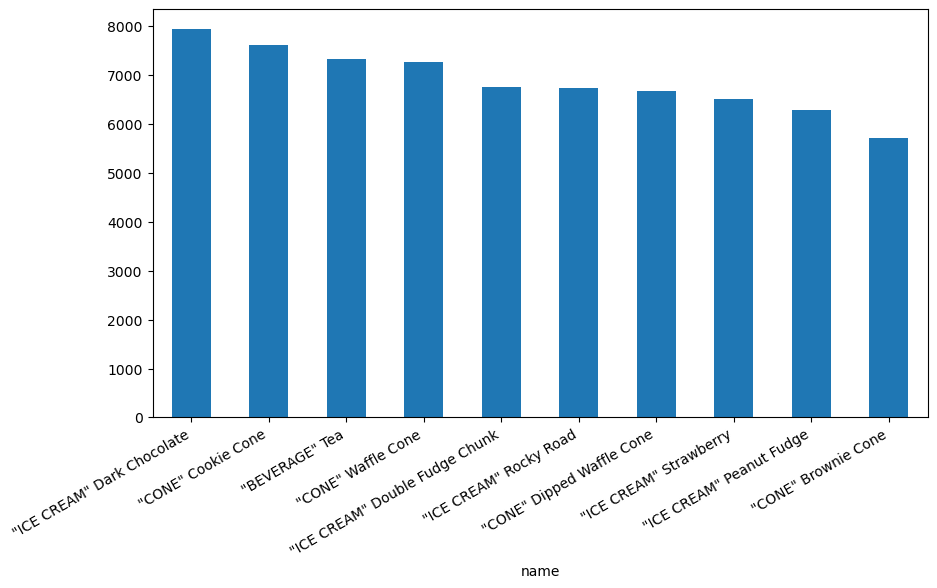

In [112]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()